---
title: Phenotypic Variations in Drosophila melanogaster
---

In this section of the notebook, we utilize Python's powerful data visualization libraries to plot the phenotypic variations observed in Drosophila melanogaster populations from different environments. Our goal is to provide a clear visual representation of the data collected during our experiment, highlighting differences in eye color and wing size across various populations.

## Libraries Used

- **Pandas:** A library providing high-performance, easy-to-use data structures, and data analysis tools for Python. In this context, we use Pandas to load our experiment data from a CSV file into a DataFrame. This allows us to manipulate and prepare our data efficiently before plotting.

- **Matplotlib:** A comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib is used here to create bar charts that visually compare the phenotypic traits (eye color and wing size) among fruit fly populations from different environments. It offers extensive customization options to make our plots informative and aesthetically pleasing.

## Plotting Code Explanation

1. **Loading Data:** First, we load our experimental data into a Pandas DataFrame. This step involves reading data from a CSV file that contains our observations of phenotypic variations across different environments.

2. **Setting Up the Plot:** We create a figure and set its size using Matplotlib to ensure our plot is large enough to be easily readable. We also define the width of the bars in our bar chart to visually separate the data points for different traits.

3. **Preparing Data for Plotting:** We extract the necessary data from our DataFrame, such as the percentages of red-eyed flies and flies with larger wings for each environment. These percentages are then used as the heights of our bars in the bar chart.

4. **Plotting the Bar Chart:** We plot two sets of bars for each environment - one representing the percentage of red-eyed flies and the other representing the percentage of flies with larger wings. Each set of bars is color-coded for easy differentiation. The bars are plotted side by side for each environment to facilitate direct comparison.

5. **Customizing the Plot:** We label the x-axis with the names of the environments and the y-axis with percentages. A title is added to the plot to describe its content. Additionally, a legend is included to clarify which bars represent which phenotypic trait.

6. **Displaying the Plot:** Finally, the plot is displayed with a call to `plt.show()`. This renders the plot within the notebook, allowing us to visually assess the phenotypic variations across the different populations of Drosophila melanogaster.

This plotting approach provides a straightforward yet powerful way to visualize complex datasets, making it easier to identify patterns and draw conclusions from our experimental data.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV data
data_path = 'fruit_fly_data.csv'
data = pd.read_csv(data_path)

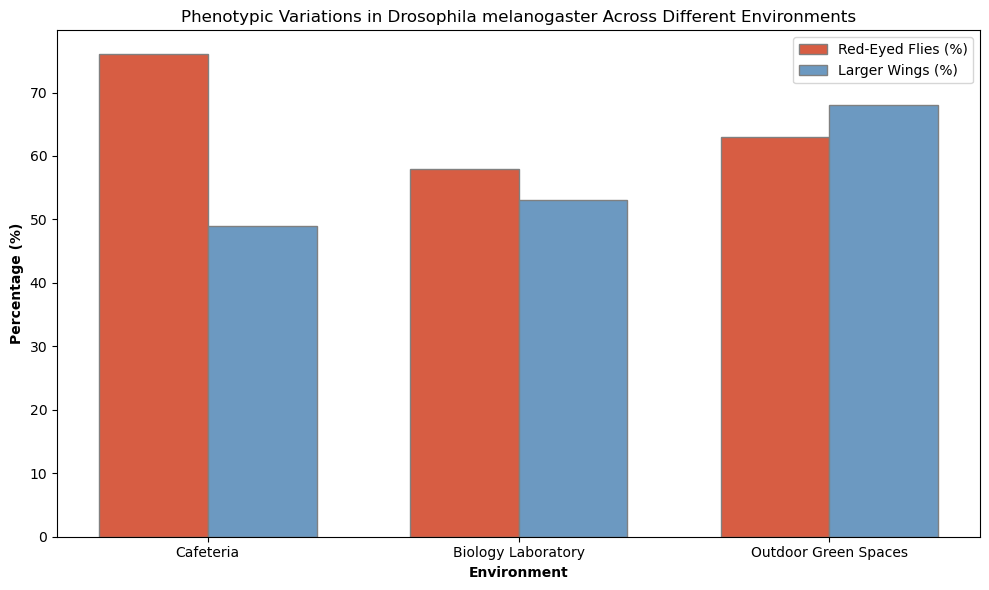

In [3]:
#| label: nb:analysis

# Plotting the data
plt.figure(figsize=(10, 6))

# Creating the bar chart
bar_width = 0.35
index = data['Environment']
red_eyes = data['Red-Eyed Flies (%)']
larger_wings = data['Larger Wings (%)']

# Setting the position of the bars on the x-axis
r1 = range(len(index))
r2 = [x + bar_width for x in r1]

# Making the plot
plt.bar(r1, red_eyes, color='#D75D43', width=bar_width, edgecolor='gray', label='Red-Eyed Flies (%)')
plt.bar(r2, larger_wings, color='#6C99C1', width=bar_width, edgecolor='gray', label='Larger Wings (%)')

# Adding labels
plt.xlabel('Environment', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(index))], index)
plt.ylabel('Percentage (%)', fontweight='bold')
plt.title('Phenotypic Variations in Drosophila melanogaster Across Different Environments')

# Creating legend & showing the plot
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()

## Statistical Analysis

## Understanding the Chi-Squared Test

The Chi-Squared test is a statistical method used to determine if there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. It's particularly useful in genetics, epidemiology, and other biological sciences for analyzing categorical data, such as phenotypic traits in populations. In our study on Drosophila melanogaster, we employ the Chi-Squared test to assess the significance of observed variations in phenotypic traits (such as eye color and wing size) across different environments.

### Key Concepts

- **Observed Frequencies:** These are the actual counts or percentages measured in our study, such as the number of red-eyed flies or flies with larger wings in each environment.

- **Expected Frequencies:** Based on a null hypothesis, these are the frequencies we would expect to see if there were no true difference across the categories being tested.

- **Degrees of Freedom (df):** This is a measure of the amount of variation or complexity in the data. For the Chi-Squared test, it's typically calculated as the number of categories minus one (df = n - 1).

- **P-value:** The probability that the observed differences occurred by chance. A low p-value (typically p < 0.05) indicates that the differences are statistically significant and not likely due to random variation.

### Application in Our Study

In our research, we conducted Chi-Squared tests to compare the distribution of two phenotypic traits (eye color and wing size) across three different environmental settings. We constructed contingency tables for each trait, listing the observed frequencies in each environment and calculated the expected frequencies under the assumption of no environmental influence.

The resulting Chi-Squared statistics and p-values allowed us to determine whether the variations observed in eye color and wing size were statistically significant. A significant result suggests an environmental impact on these traits, contributing to our understanding of genetic variation and environmental adaptation in Drosophila melanogaster.

### Interpretation

- **If the p-value is less than 0.05:** We reject the null hypothesis, concluding that there is a significant difference in the trait distributions across environments, suggesting environmental influence.

- **If the p-value is greater than or equal to 0.05:** We fail to reject the null hypothesis, indicating that any observed differences might be due to chance, and we cannot conclusively say there is an environmental effect.

The Chi-Squared test is a cornerstone of categorical data analysis, providing insights into the relationships between different variables and helping us unravel the complex interplay between genetics and the environment.

In [4]:
#| label: nb:chi-squared
from scipy.stats import chi2_contingency

# Data preparation for chi-squared test
# Assuming the total number of observed flies in each environment is the same for simplicity, e.g., 100 flies in each.
# This means the counts for non-red-eyed and smaller wings can be inferred.
# The observed frequencies, it would be better to load this from the CSV directly!
observed_red_eyes = [76, 58, 63]  # Red-Eyed Flies counts
observed_larger_wings = [49, 53, 68]  # Larger Wings counts

# Calculate the complement (non-red eyes and smaller wings)
total_flies_per_env = 100  # Assuming 100 flies were observed per environment for simplicity
observed_non_red_eyes = [total_flies_per_env - count for count in observed_red_eyes]
observed_smaller_wings = [total_flies_per_env - count for count in observed_larger_wings]

# Constructing the contingency table for chi-squared tests
# Table structure:
# | Environment | Red-Eyed Flies | Non-Red-Eyed Flies |
# | Environment | Larger Wings   | Smaller Wings      |
contingency_table_red_eyes = [observed_red_eyes, observed_non_red_eyes]
contingency_table_larger_wings = [observed_larger_wings, observed_smaller_wings]

# Performing the chi-squared tests
chi2_test_red_eyes = chi2_contingency(contingency_table_red_eyes)
chi2_test_larger_wings = chi2_contingency(contingency_table_larger_wings)

chi2_test_red_eyes[0:3], chi2_test_larger_wings[0:3]

((7.6585678379577145, 0.021725167040948054, 2),
 (8.171945701357465, 0.016806780871913337, 2))

These results indicate that there are statistically significant differences in the distribution of both red-eyed flies and flies with larger wings across the different environments (cafeteria, biology laboratory, outdoor green spaces), with p-values below the typical alpha level of 0.05. This suggests that environmental factors may indeed play a role in influencing these phenotypic traits. 